<a href="https://colab.research.google.com/github/aayush97/GoogleColabPetProjects/blob/master/Classification_on_a_CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from skimage import io, transform
import pandas

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3,2) # 3 input channels RGB, 10 output channels, 3x3 kernel, valid convolution
    self.d1 = nn.Dropout2d(p=.2)
    self.conv2 = nn.Conv2d(10,20,5,2) # 10 input channels, 20 output channels, 5x5 kernel, stride=2
    self.d2 = nn.Dropout2d(p=.2)
    # 13x13x20
    self.fc1 = nn.Linear(6*6*20, 120)
    self.d3 = nn.Dropout(p=.5)
    self.fc2 = nn.Linear(120,80)
    self.fc3 = nn.Linear(80,10)
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.d1(x)
    x = F.relu(self.conv2(x))
    x = self.d2(x)
    # reshape x
    x=x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = self.d3(x)
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features(self,x):
    size = x.size()[1:]
    retVal=1
    for s in size:
      retVal*=s
    return retVal

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


In [0]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(2, 2))
  (d1): Dropout2d(p=0.2)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(2, 2))
  (d2): Dropout2d(p=0.2)
  (fc1): Linear(in_features=720, out_features=120, bias=True)
  (d3): Dropout(p=0.5)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)


In [0]:
# load_dataset #CIFAR 10
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
PATH = '/content/gdrive/My Drive/'
x_train =  torch.tensor(1)
y_train = torch.tensor(1)

In [0]:
# get images from CIFAR dataset
for i in range(5):  
  dataset =  unpickle(PATH+'cifar-10-python/cifar-10-batches-py/data_batch_'+str(i+1))
  datan = dataset[b'data']
  labels = dataset[b'labels']
  labels = torch.LongTensor(labels)
  labels = labels.view(1,10000)
  data = torch.from_numpy(datan)
  data = data.view(1,10000,3,32,32)
  data = data.float()
  if(i==0):
    x_train = data
    y_train = labels
  else:
    x_train = torch.cat((x_train,data),0)
    y_train = torch.cat((y_train,labels),0)
      

In [0]:
#testing dataset
dataset =  unpickle(PATH+'cifar-10-python/cifar-10-batches-py/test_batch')
datan = dataset[b'data']
labels = dataset[b'labels']
labels = torch.LongTensor(labels)
labels = labels.view(1,10000)
data = torch.from_numpy(datan)
data = data.view(1,10000,3,32,32)
data=data.float()
x_test = data
y_test = labels

In [0]:
import torch.optim as optim
#Loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
#training
epochs = 30
for epoch in range(epochs):
  for i in range(5):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(x_train[i])
    loss = criterion(output, y_train[i])
    loss.backward()
    optimizer.step()
  print(loss)


tensor(1.5682, grad_fn=<NllLossBackward>)
tensor(1.5103, grad_fn=<NllLossBackward>)
tensor(1.5142, grad_fn=<NllLossBackward>)
tensor(1.4811, grad_fn=<NllLossBackward>)
tensor(1.4565, grad_fn=<NllLossBackward>)
tensor(1.4592, grad_fn=<NllLossBackward>)
tensor(1.4639, grad_fn=<NllLossBackward>)
tensor(1.4529, grad_fn=<NllLossBackward>)
tensor(1.4449, grad_fn=<NllLossBackward>)
tensor(1.4435, grad_fn=<NllLossBackward>)
tensor(1.4307, grad_fn=<NllLossBackward>)
tensor(1.4352, grad_fn=<NllLossBackward>)
tensor(1.4213, grad_fn=<NllLossBackward>)
tensor(1.4195, grad_fn=<NllLossBackward>)
tensor(1.4293, grad_fn=<NllLossBackward>)
tensor(1.4151, grad_fn=<NllLossBackward>)
tensor(1.4259, grad_fn=<NllLossBackward>)
tensor(1.4325, grad_fn=<NllLossBackward>)
tensor(1.4152, grad_fn=<NllLossBackward>)
tensor(1.4091, grad_fn=<NllLossBackward>)
tensor(1.4021, grad_fn=<NllLossBackward>)
tensor(1.3982, grad_fn=<NllLossBackward>)
tensor(1.3876, grad_fn=<NllLossBackward>)
tensor(1.3930, grad_fn=<NllLossBac

In [0]:
#testing
correct = 0
total = 0
with torch.no_grad():
    output = net(x_test[0])
    for i in range(output.shape[0]):
      _,index = output[i].max(0)
      if(y_test[0][i]==index):
        correct+=1
    total = output.shape[0]
    
print('Accuracy of the network on   the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on   the 10000 test images: 57 %


In [0]:
net.d1.eval()
net.d2.eval()
net.d3.eval()
print(net)

Net(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(2, 2))
  (d1): Dropout2d(p=0.2)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(2, 2))
  (d2): Dropout2d(p=0.2)
  (fc1): Linear(in_features=720, out_features=120, bias=True)
  (d3): Dropout(p=0.5)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)


**Classify MNIST Handwritten digits using the same neural network architecture**

In [0]:
from pathlib import Path
import requests

In [0]:
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [0]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

torch.Size([50000, 784])
torch.Size([50000, 32, 32])


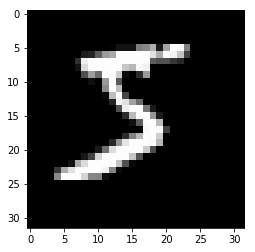

In [0]:
import torch
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
print (x_train.shape)
x_train = x_train.view(-1,28,28)
x_t = torch.zeros([50000,32,32])
print(x_t.shape)
x_t[:,:28,:28] = x_train
x_train = x_t
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0], cmap="gray")

torch.Size([10000, 784])
torch.Size([10000, 32, 32])


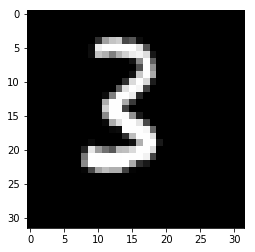

In [0]:

print (x_valid.shape)
x_valid = x_valid.view(-1,28,28)
x_v = torch.zeros([10000,32,32])
print(x_v.shape)
x_v[:,:28,:28] = x_valid
x_valid = x_v
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_valid[0], cmap="gray")

In [0]:
class Net2(nn.Module):
  
  def __init__(self):
    super(Net2,self).__init__()
    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
    
  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)),2)
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
    
  def num_flat_features(self,x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features
net2 = Net2()
print(net2)

Net2(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [0]:
#train net2
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net2.parameters())
#training
epochs = 5
for epoch in range(epochs):
  for i in range(500):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net2(x_train[i*100:(i+1)*100].view(100,1,32,32))
    loss = criterion(output, y_train[i*100:(i+1)*100])
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0514, grad_fn=<NllLossBackward>)
tensor(0.0196, grad_fn=<NllLossBackward>)
tensor(0.0280, grad_fn=<NllLossBackward>)
tensor(0.0568, grad_fn=<NllLossBackward>)
tensor(0.0483, grad_fn=<NllLossBackward>)


In [0]:
#testing
correct = 0
total = 0
with torch.no_grad():
    output = net2(x_valid.view(-1,1,32,32))
    for i in range(output.shape[0]):
      _,index = output[i].max(0)
      if(y_valid[i]==index):
        correct+=1
    total = output.shape[0]
    
print('Accuracy of the network on the', total ,'test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 98 %
